In [ ]:
!pip install q keras==2.10.0
!pip install q tensorflow==2.10.0



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 44.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  At

In [ ]:
#import numpy as np
#print(np.__version__)
import tensorflow as tf
print(tf.__version__)
import keras as keras
print(keras.__version__)

2.10.0
2.10.0


In [ ]:

import numpy as np
import matplotlib as mpl
#mpl.use('Agg')

import matplotlib.pyplot as plt

#plt.ioff()

import seaborn as sns
from pandas import DataFrame
from sklearn.metrics import normalized_mutual_info_score,adjusted_rand_score,homogeneity_score,completeness_score,silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope


markers = {',': 'pixel', 'o': 'circle','*': 'star', 'v': 'triangle_down',
           '^': 'triangle_up', '<': 'triangle_left', '>': 'triangle_right',
           '1': 'tri_down', '2': 'tri_up', '3': 'tri_left', '4': 'tri_right',
           '8': 'octagon', 's': 'square', 'p': 'pentagon',
           'h': 'hexagon1', 'H': 'hexagon2', '+': 'plus', 'x': 'x', '.': 'point',
           'D': 'diamond', 'd': 'thin_diamond', '|': 'vline', '_': 'hline',
           'P': 'plus_filled', 'X': 'x_filled', 0: 'tickleft',
           1: 'tickright', 2: 'tickup', 3: 'tickdown', 4: 'caretleft', 5: 'caretright',
           6: 'caretup', 7: 'caretdown', 8: 'caretleftbase', 9: 'caretrightbase', 10: 'caretupbase',
           11: 'caretdownbase', 'None': 'nothing', None: 'nothing', ' ': 'nothing', '': 'nothing'}
markers_keys = list(markers.keys())[:20]

font = {'family' : 'normal',
         'weight' : 'bold',
         'size'   : 30}

mpl.rc('font', **font)

sns.set_style("ticks")

colors = ["windows blue", "amber",
          "greyish", "faded green",
          "dusty purple","royal blue","lilac",
          "salmon","bright turquoise",
          "dark maroon","light tan",
          "orange","orchid",
          "sandy","topaz",
          "fuchsia","yellow",
          "crimson","cream"
          ]
current_palette = sns.xkcd_palette(colors)

def print_2D( points,label,id_map ):
    '''
    points: N_samples * 2
    label: (int) N_samples
    id_map: map label id to its name
    '''
    fig = plt.figure()
    #current_palette = sns.color_palette("RdBu_r", max(label)+1)
    n_cell,_ = points.shape
    if n_cell > 500:
        s = 10
    else:
        s = 20

    ax = plt.subplot(111)
    print( np.unique(label) )
    for i in np.unique(label):
        ax.scatter( points[label==i,0], points[label==i,1], c=current_palette[i], label=id_map[i], s=s,marker=markers_keys[i] )
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])

    ax.legend(scatterpoints=1,loc='upper center',
              bbox_to_anchor=(0.5,-0.08),ncol=6,
              fancybox=True,
              prop={'size':8}
              )
    sns.despine()
    return fig

def print_heatmap( points,label,id_map ):
    '''
    points: N_samples * N_features
    label: (int) N_samples
    id_map: map label id to its name
    '''
    # = sns.color_palette("RdBu_r", max(label)+1)
    #cNorm = colors.Normalize(vmin=0,vmax=max(label)) #normalise the colormap
    #scalarMap = cm.ScalarMappable(norm=cNorm,cmap='Paired') #map numbers to colors

    index = [id_map[i] for i in label]
    df = DataFrame(
            points,
            columns = list(range(points.shape[1])),
            index = index
            )
    row_color = [current_palette[i] for i in label]

    cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
    g = sns.clustermap( df,cmap=cmap,row_colors=row_color,col_cluster=False,xticklabels=False,yticklabels=False) #,standard_scale=1 )

    return g.fig

def measure( predicted,true ):
    # NMI measures how corrleated two datasets are. 1 = perfect correlation, 0 = no correlation
    NMI = normalized_mutual_info_score( true,predicted )

    # computes simi
    RAND = adjusted_rand_score( true,predicted )

    HOMO = homogeneity_score( true,predicted )

    COMPLETENESS = completeness_score( true,predicted )

    return {'NMI':NMI,'RAND':RAND,'HOMOGENEITY':HOMO,'COMPLETENESS':COMPLETENESS}

def clustering( points, k=2,name='kmeans'):
    '''
    points: N_samples * N_features
    k: number of clusters
    '''
    if name == 'kmeans':
        kmeans = KMeans( n_clusters=k,n_init=100 ).fit(points)
        ## print within_variance
        #cluster_distance = kmeans.transform( points )
        #within_variance = sum( np.min(cluster_distance,axis=1) ) / float( points.shape[0] )
        #print("AvgWithinSS:"+str(within_variance))
        if len( np.unique(kmeans.labels_) ) > 1:
            si = silhouette_score( points,kmeans.labels_ )
            #print("Silhouette:"+str(si))
        else:
            si = 0
            print("Silhouette:"+str(si))
        return kmeans.labels_,si

    if name == 'spec':
        spec= SpectralClustering( n_clusters=k,affinity='cosine' ).fit( points )
        si = silhouette_score( points,spec.labels_ )
        print("Silhouette:"+str(si))
        return spec.labels_,si

def cart2polar( points ):
    '''
    points: N_samples * 2
    '''
    return np.c_[np.abs(points), np.angle(points)]

def outliers_detection(expr):
    x = PCA(n_components=2).fit_transform(expr)
    ee = EllipticEnvelope()
    ee.fit(x)
    oo = ee.predict(x)

    return oo











In [ ]:
config={
    'epoch':10000,
    'batch_size':256,
    'latent':10,
    'log':False,
    'scale':True,
    'patience':10
}

In [ ]:
# -*- coding: utf-8 -*-
import keras
from keras.layers import Input,Dense,Activation,Lambda,RepeatVector,Concatenate,Multiply,Reshape,Layer,Dropout,BatchNormalization,Permute
import keras.backend as K
from keras.models import Model
#from helpers import measure,clustering,print_2D,print_heatmap,cart2polar,outliers_detection
#from keras.utils.vis_utils import plot_model
from keras import regularizers
#from keras.utils.layer_utils import print_summary
import numpy as np
from keras.optimizers import RMSprop,Adagrad,Adam
from keras import metrics
#from config import config
import h5py
import tensorflow as tf
from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

tau = 1.0

def sampling(args):
    epsilon_std = 1.0

    args = tf.convert_to_tensor(args)

    if args.shape[0] == 2:
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean),
                              mean=0.,
                              stddev=epsilon_std)
    #
        return z_mean + K.exp( z_log_var / 2 ) * epsilon
    else:
        z_mean = args[0]
        epsilon = K.random_normal(shape=K.shape(z_mean),
                              mean=0.,
                              stddev=epsilon_std)
        return z_mean + K.exp( 1.0 / 2 ) * epsilon


def sampling_gumbel(shape,eps=1e-8):
    u = K.random_uniform( shape )
    return -K.log( -K.log(u+eps)+eps )

def compute_softmax(logits,temp):
    z = logits + sampling_gumbel( K.shape(logits) )
    return K.softmax( z / temp )

def gumbel_softmax(args):
    logits,temp = args
    return compute_softmax(logits,temp)

class NoiseLayer(Layer):
    def __init__(self, ratio, **kwargs):
        super(NoiseLayer, self).__init__(**kwargs)
        self.supports_masking = True
        self.ratio = ratio

    def call(self, inputs, training=None):
        def noised():
            return inputs * K.random_binomial(shape=K.shape(inputs),
                                              p=self.ratio
                                              )
        return K.in_train_phase(noised, inputs, training=training)

    def get_config(self):
        config = {'ratio': self.ratio}
        base_config = super(NoiseLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


        return dict(list(base_config.items()) + list(config.items()))

class VASC:
    def __init__(self,in_dim,latent=2,var=False):
        self.in_dim =in_dim
        self.vae = None
        self.ae = None
        self.aux = None
        self.latent = latent
        self.var = var


    def vaeBuild( self ):
        var_ = self.var
        in_dim = self.in_dim
        expr_in = Input( shape=(self.in_dim,) )

        ##### The first part of model to recover the expr.
        h0 = Dropout(0.5)(expr_in)
        ## Encoder layers
        h1 = Dense( units=512,name='encoder_1',kernel_regularizer=regularizers.l1(0.01) )(h0)
        h2 = Dense( units=128,name='encoder_2' )(h1)
        h2_relu = Activation('relu')(h2)
        h3 = Dense( units=32,name='encoder_3' )(h2_relu)
        h3_relu = Activation('relu')(h3)


        z_mean = Dense( units= self.latent ,name='z_mean' )(h3_relu)
        if self.var:
            z_log_var = Dense( units=2,name='z_log_var' )(h3_relu)
            z_log_var = Activation( 'softplus' )(z_log_var)


        ## sampling new samples
            z = Lambda(sampling, output_shape=(self.latent,))([z_mean,z_log_var])
        else:
            z = Lambda(sampling, output_shape=(self.latent,))([z_mean])

        ## Decoder layers
        decoder_h1 = Dense( units=32,name='decoder_1' )(z)
        decoder_h1_relu = Activation('relu')(decoder_h1)
        decoder_h2 = Dense( units=128,name='decoder_2' )(decoder_h1_relu)
        decoder_h2_relu = Activation('relu')(decoder_h2)
        decoder_h3 = Dense( units=512,name='decoder_3' )(decoder_h2_relu)
        decoder_h3_relu = Activation('relu')(decoder_h3)
        expr_x = Dense(units=self.in_dim,activation='sigmoid')(decoder_h3_relu)


        expr_x_drop = Lambda( lambda x: -x ** 2 )(expr_x)
        #expr_x_drop_log = merge( [drop_ratio,expr_x_drop],mode='mul' )  ###  log p_drop =  log(exp(-\lambda x^2))
        expr_x_drop_p = Lambda( lambda x:K.exp(x) )(expr_x_drop)
        expr_x_nondrop_p = Lambda( lambda x:1-x )( expr_x_drop_p )
        expr_x_nondrop_log = Lambda( lambda x:K.log(x+1e-20) )(expr_x_nondrop_p)
        expr_x_drop_log = Lambda( lambda x:K.log(x+1e-20) )(expr_x_drop_p)
        expr_x_drop_log = Reshape( target_shape=(self.in_dim,1) )(expr_x_drop_log)
        expr_x_nondrop_log = Reshape( target_shape=(self.in_dim,1) )(expr_x_nondrop_log)
        # logits = merge( [expr_x_drop_log,expr_x_nondrop_log],mode='concat',concat_axis=-1 )
        # breakpoint()
        logits = Concatenate(axis=-1)([expr_x_drop_log,expr_x_nondrop_log])
        temp_in = Input( shape=(self.in_dim,) )
        temp_ = RepeatVector( 2 )(temp_in)
        # print('temp_.shape',temp_.shape)
        temp_ = Permute( (2,1) )(temp_)
        samples = Lambda( gumbel_softmax,output_shape=(self.in_dim,2,) )( [logits,temp_] )
        samples = Lambda( lambda x:x[:,:,1] )(samples)
        samples = Reshape( target_shape=(self.in_dim,) )(samples)
##        #print(samples.shape)

        # out = merge( [expr_x,samples],mode='mul' )
        out = Multiply()([expr_x,samples])

        class VariationalLayer(Layer):
            def __init__(self, **kwargs):
                self.is_placeholder = True
                super(VariationalLayer, self).__init__(**kwargs)

            def vae_loss(self, x, x_decoded_mean):
                xent_loss = in_dim * metrics.binary_crossentropy(x, x_decoded_mean)
                if var_:
                    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
                else:
                    kl_loss = - 0.5 * K.sum(1 + 1 - K.square(z_mean) - K.exp(1.0), axis=-1)
                return K.mean(xent_loss + kl_loss)

            def call(self, inputs):
                x = inputs[0]
                x_decoded_mean = inputs[1]
                loss = self.vae_loss(x, x_decoded_mean)
                self.add_loss(loss, inputs=inputs)
                # We won't actually use the output.
                return x

        y = VariationalLayer()([expr_in, out])
        vae = Model( inputs= [expr_in,temp_in],outputs=y )

        opt = RMSprop(learning_rate=0.0001 )
        vae.compile(optimizer=opt,loss=None )

        ae = Model( inputs=[expr_in,temp_in],outputs=[ h1,h2,h3,h2_relu,h3_relu,
                                                       z_mean,z,decoder_h1,decoder_h1_relu,
                                                       decoder_h2,decoder_h2_relu,decoder_h3,decoder_h3_relu,
                                                       samples,out
                                                       ] )
        aux = Model( inputs=[expr_in,temp_in],outputs=[out] )

        self.vae = vae
        self.ae = ae
        self.aux = aux


above this works

In [ ]:
# works works!!
def train_vasc(expr,
               epochs=5000,
               latent=2,
               patience=10,
               min_stop=500,
               batch_size=32,
               var=False,
               prefix='test',
               label=None,
               log=True,
               scale=True,
               annealing=False,
               tau0=1.0,
               min_tau=0.5,
               rep=0):
    '''
    VASC: variational autoencoder for scRNA-seq datasets

    Parameters:
        expr: expression matrix (n_cells * n_features)
        epochs: maximum number of epochs, default 5000
        latent: dimension of latent variables, default 2
        patience: stop if loss shows insignificant decrease within *patience* epochs, default 50
        min_stop: minimum number of epochs, default 500
        batch_size: batch size for stochastic optimization, default 32
        var: whether to estimate the variance parameters, default False
        prefix: prefix to store the results, default 'test'
        label: numpy array of true labels, default None
        log: if log-transformation should be performed, default True
        scale: if scaling (making values within [0,1]) should be performed, default True
        annealing: if annealing should be performed for Gumbel approximation, default False
        tau0: initial temperature for annealing or temperature without annealing, default 1.0
        min_tau: minimal tau during annealing, default 0.5
        rep: not used
    '''

    expr[expr < 0] = 0.0 # no negatives
    if log:
        expr = np.log2(expr + 1)
    if scale:
        for i in range(expr.shape[0]):
            expr[i, :] = expr[i, :] / np.max(expr[i, :])

    if rep > 0:
        expr_train = np.matlib.repmat(expr, rep, 1)
    else:
        expr_train = np.copy(expr)

    vae_ = VASC(in_dim=expr.shape[1], latent=latent, var=var)
    vae_.vaeBuild()

    points = []
    latent_representations = []
    reconstructed_data = []
    loss = []
    prev_loss = np.inf
    tau = tau0
    anneal_rate = 0.0003

    for e in range(epochs):
        cur_loss = prev_loss
        if e % 100 == 0 and annealing:
            tau = max(tau0 * np.exp(-anneal_rate * e), min_tau)

        tau_in = np.ones(expr_train.shape, dtype='float32') * tau
        loss_ = vae_.vae.fit([expr_train, tau_in], epochs=1, batch_size=batch_size, shuffle=True, verbose=0)
        train_loss = loss_.history['loss'][0]
        cur_loss = min(train_loss, cur_loss)
        loss.append(train_loss)

        res = vae_.ae.predict([expr, tau_in])
        latent_representations.append(res[5])  # latent representation at index 5
        reconstructed_data.append(res[-1])  # reconstructed output at the last index

        if e % patience == 1:
            print("Epoch %d/%d" % (e, epochs))
            print("Loss:" + str(train_loss))
            print("current loss: ", cur_loss, "previous loss:", prev_loss)
            if abs(cur_loss - prev_loss) < 0.1:
                print('current loss - prev loss < 0.1, breaking')
                break
            prev_loss = train_loss

    # results to an H5 file
    aux_res = h5py.File(prefix + '_' + str(latent) + '_res.h5', 'w')
    aux_res.create_dataset('POINTS', data=np.array(latent_representations))
    aux_res.create_dataset('LOSS', data=np.array(loss))
    aux_res.create_dataset('RECONSTRUCTED', data=np.array(reconstructed_data))
    aux_res.close()

    return vae_, np.array(latent_representations), np.array(reconstructed_data), np.array(loss)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
#from vasc import VASC, train_vasc
#from helpers import clustering, measure, print_2D
#from config import config
from keras import metrics

if __name__ == '__main__':
    DATASET = '/content/biase'
    PREFIX = '/content/biase'

    filename = DATASET + '.txt'
    data = open(filename)
    head = data.readline().rstrip().split()

    label_file = open(DATASET + '_label.txt')
    label_dict = {}
    for line in label_file:
        temp = line.rstrip().split()
        label_dict[temp[0]] = temp[1]
    label_file.close()

    label = []
    for c in head:
        if c in label_dict.keys():
            label.append(label_dict[c])
        else:
            print(c)

    label_set = []
    for c in label:
        if c not in label_set:
            label_set.append(c)
    name_map = {value: idx for idx, value in enumerate(label_set)}
    label = np.asarray([name_map[name] for name in label])

    expr = []
    for line in data:
        temp = line.rstrip().split()[1:]
        temp = [float(x) for x in temp]
        expr.append(temp)

    expr = np.asarray(expr).T
    n_cell, _ = expr.shape
    if n_cell > 150:
        batch_size = 32
    else:
        batch_size = 32

    # train the model
    print("Iteration: 0")
    vae_model, latent_reps, reconstructed_data, training_loss = train_vasc(
        expr,
        var=False,
        latent=2,
        annealing=False,
        batch_size=batch_size,
        prefix=PREFIX,
        label=label,
        log=True,
        scale=True,
        patience=20  # override defualt
    )



Iteration: 0


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Epoch 1/5000
Loss:19516.557198660714
current loss:  19516.557198660714 previous loss: inf
Epoch 21/5000
Loss:14455.628348214286
current loss:  14455.628348214286 previous loss: 19516.557198660714
Epoch 41/5000
Loss:13607.810965401786
current loss:  13607.810965401786 previous loss: 14455.628348214286
Epoch 61/5000
Loss:13092.803013392857
current loss:  13092.803013392857 previous loss: 13607.810965401786
Epoch 81/5000
Loss:12791.47181919643
current loss:  12791.47181919643 previous loss: 13092.803013392857
Epoch 101/5000
Loss:12600.374720982143
current loss:  12600.374720982143 previous loss: 12791.47181919643
Epoch 121/5000
Loss:12537.073521205357
current loss:  12537.073521205357 previous loss: 12600.374720982143
Epoch 141/5000
Loss:12454.29087611607
current loss:  12454.29087611607 previous loss: 12537.073521205357
Epoch 161/5000
Loss:12342.55385044643
current loss:  12342.55385044643 previous loss: 12454.29087611607
Epoch 181/5000
Loss:12277.814453125
current loss:  12277.814453125

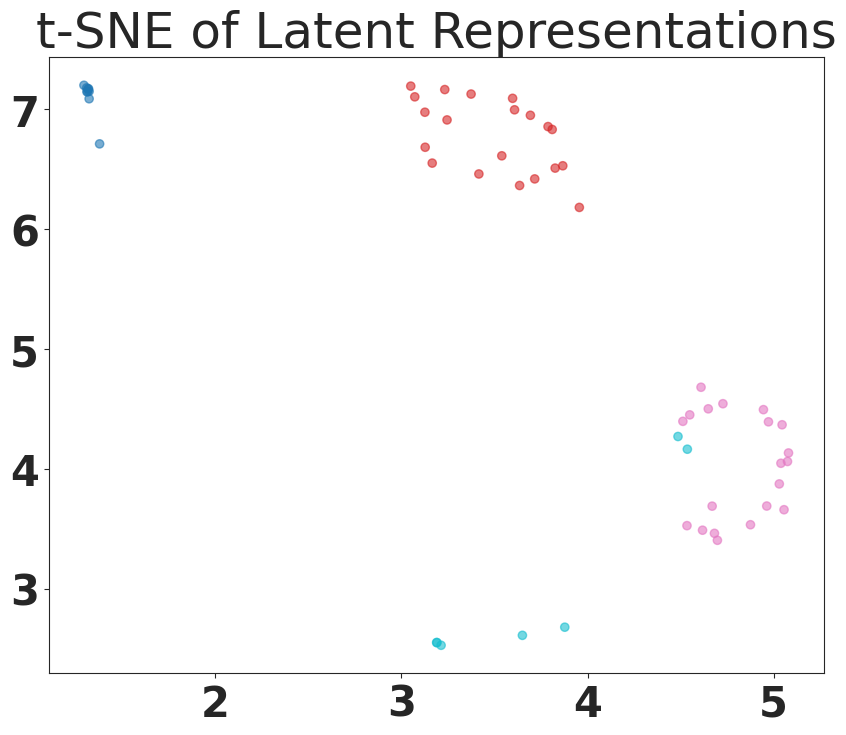

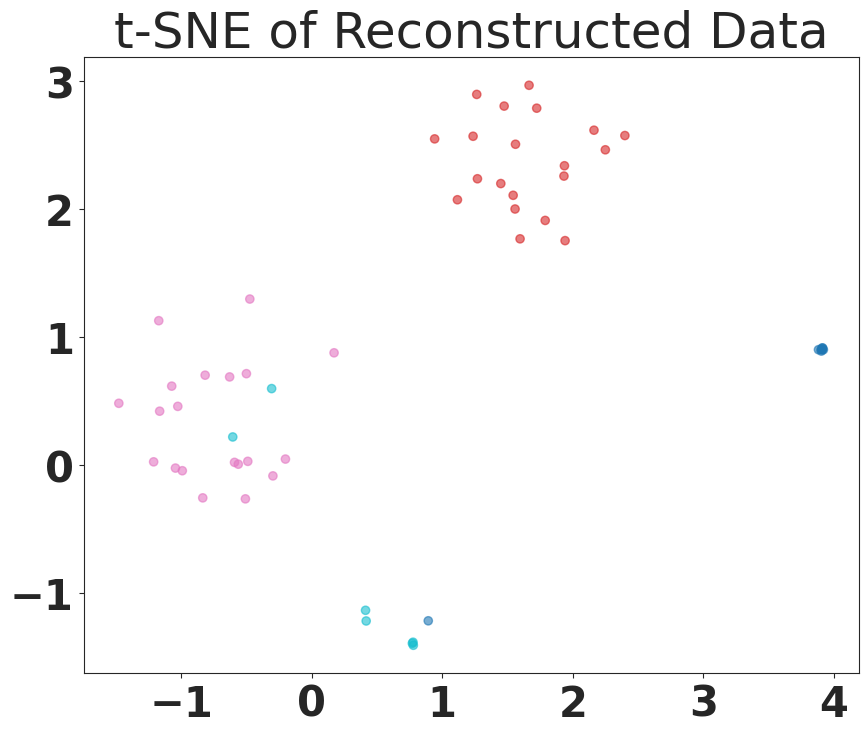

In [ ]:

    # t-SNE on latent representations
    tsne_latent = TSNE(n_components=2, random_state=42).fit_transform(latent_reps[-1])  # [-1] is last epoch data
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_latent[:, 0], tsne_latent[:, 1], c=label, cmap='tab10', alpha=0.6)
    plt.title('t-SNE of Latent Representations')
    plt.show()

    # t-SNE on reconstructed data
    tsne_reconstructed = TSNE(n_components=2, random_state=42).fit_transform(reconstructed_data[-1])  # [-1] is last epoch data
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_reconstructed[:, 0], tsne_reconstructed[:, 1], c=label, cmap='tab10', alpha=0.6)
    plt.title('t-SNE of Reconstructed Data')
    plt.show()

In [ ]:
# double check to make sure tsne is right and good
# t-SNE on latent representations
tsne_latent = TSNE(n_components=2, random_state=42).fit_transform(latent_reps[-1])  # [-1] is last epoch data
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_latent[:, 0], tsne_latent[:, 1], c=label, cmap='tab10', alpha=0.6)
plt.colorbar(scatter)
plt.title('t-SNE of Latent Representations')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


# pply t-SNE to reconstructed data
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_reconstructed = tsne.fit_transform(reconstructed_data[-1])
plt.figure(figsize=(10, 8))
plt.scatter(tsne_reconstructed[:, 0], tsne_reconstructed[:, 1], c=label, cmap='tab10', alpha=0.6)
plt.colorbar()
plt.title('t-SNE of Reconstructed Data')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-2-2e3bbac645f3>:67: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter( points[label==i,0], points[label==i,1], c=current_palette[i], label=id_map[i], s=s,marker=markers_keys[i] )


Clustering Metrics:
Normalized Mutual Information (NMI): 0.9232425411905947
Adjusted Rand Index (ARI): 0.9217481265281982
Homogeneity: 0.9071668964991539
Completeness: 0.9398982080777898
[0 1 2 3]


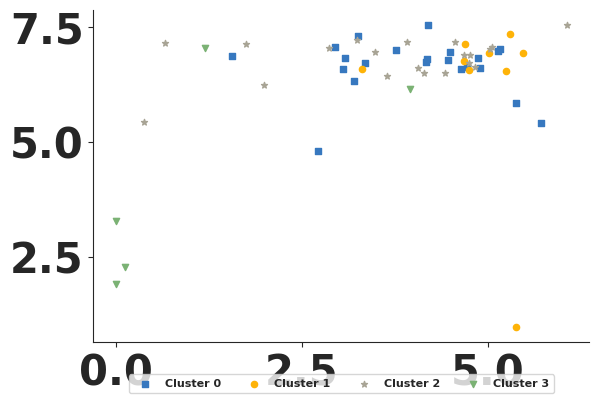

In [ ]:
# apply clustering
kmeans = KMeans(n_clusters=len(np.unique(label)), random_state=42)
kmeans.fit(latent_reps[-1])
predicted_labels = kmeans.labels_

# measure clustering performance
metrics = measure(predicted_labels, label)
print("Clustering Metrics:")
print(f"Normalized Mutual Information (NMI): {metrics['NMI']}")
print(f"Adjusted Rand Index (ARI): {metrics['RAND']}")
print(f"Homogeneity: {metrics['HOMOGENEITY']}")
print(f"Completeness: {metrics['COMPLETENESS']}")

# viz the clustering
id_map = {idx: f"Cluster {idx}" for idx in range(len(np.unique(label)))}
fig = print_2D(expr, predicted_labels, id_map)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Metrics:
Normalized Mutual Information (NMI): 0.8824205399613051
Adjusted Rand Index (ARI): 0.901202031763618
Homogeneity: 0.8697210308789426
Completeness: 0.895496416560308
[0 1 2 3]


<ipython-input-2-2e3bbac645f3>:67: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter( points[label==i,0], points[label==i,1], c=current_palette[i], label=id_map[i], s=s,marker=markers_keys[i] )


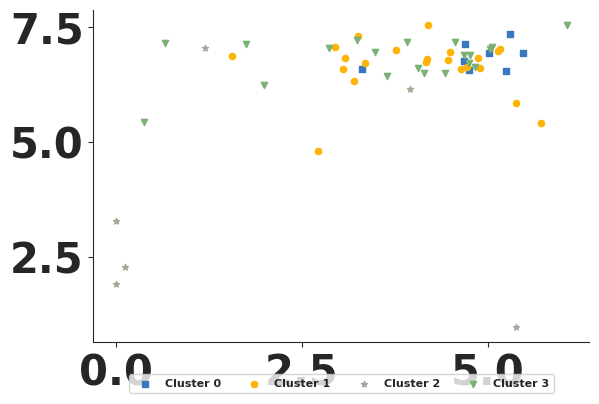

In [ ]:
# apply clustering
kmeans = KMeans(n_clusters=len(np.unique(label)), random_state=42)
kmeans.fit(reconstructed_data[-1])
predicted_labels = kmeans.labels_

# measure clustering performance
metrics = measure(predicted_labels, label)
print("Clustering Metrics:")
print(f"Normalized Mutual Information (NMI): {metrics['NMI']}")
print(f"Adjusted Rand Index (ARI): {metrics['RAND']}")
print(f"Homogeneity: {metrics['HOMOGENEITY']}")
print(f"Completeness: {metrics['COMPLETENESS']}")

# viz the clustering
id_map = {idx: f"Cluster {idx}" for idx in range(len(np.unique(label)))}
fig = print_2D(expr, predicted_labels, id_map)
plt.show()

data prep for comparison

In [ ]:
# transform data for other algos (transform handled within algo for VASC)
#print(expr)
# log
expr2 = np.log2(expr + 1)
# scale
for i in range(expr.shape[0]):
    expr2[i, :] = expr2[i, :] / np.max(expr2[i, :])

#print(expr2)


original data

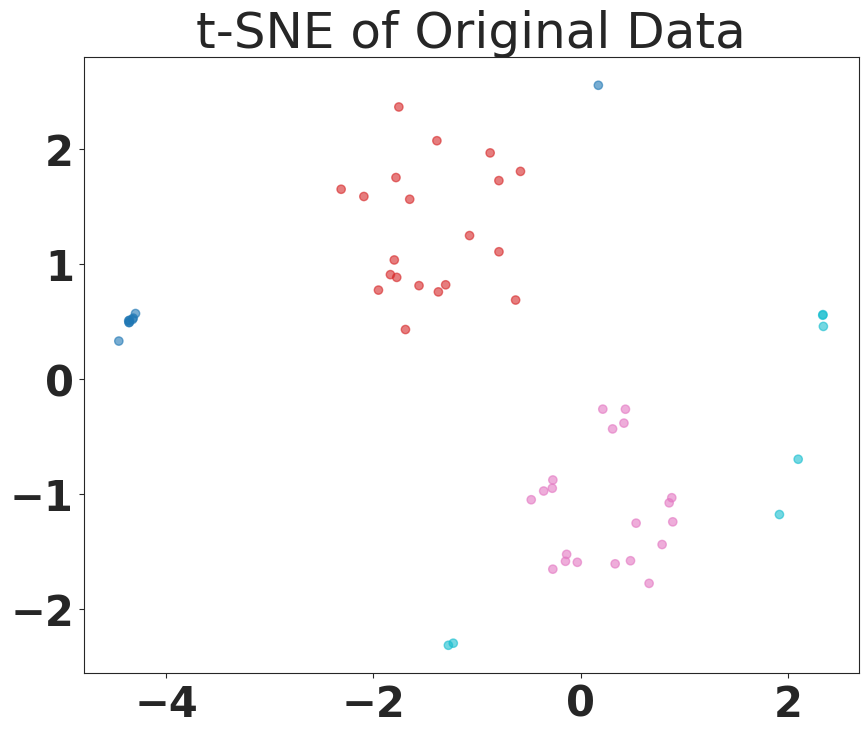

In [ ]:
# expr is our original expression matrix / label is an array of labels for each sample in expr
# expr2 is the transformed data
# t-SNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_results_original = tsne.fit_transform(expr2)

# plot t-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results_original[:, 0], tsne_results_original[:, 1], c=label, cmap='tab10', alpha=0.6)
plt.title('t-SNE of Original Data')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Metrics:
Normalized Mutual Information (NMI): 0.8628264996152113
Adjusted Rand Index (ARI): 0.8697708506572868
Homogeneity: 0.8419827834744833
Completeness: 0.8847284055799015
[0 1 2 3]


<ipython-input-2-2e3bbac645f3>:67: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter( points[label==i,0], points[label==i,1], c=current_palette[i], label=id_map[i], s=s,marker=markers_keys[i] )


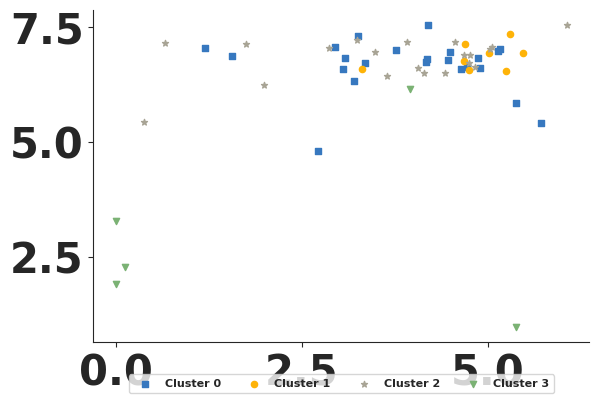

In [ ]:
#from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
#import matplotlib.pyplot as plt

# apply clustering
kmeans = KMeans(n_clusters=len(np.unique(label)), random_state=42)
kmeans.fit(expr2)
predicted_labels = kmeans.labels_

# measure clustering performance
metrics = measure(predicted_labels, label)
print("Clustering Metrics:")
print(f"Normalized Mutual Information (NMI): {metrics['NMI']}")
print(f"Adjusted Rand Index (ARI): {metrics['RAND']}")
print(f"Homogeneity: {metrics['HOMOGENEITY']}")
print(f"Completeness: {metrics['COMPLETENESS']}")

# viz the clustering
id_map = {idx: f"Cluster {idx}" for idx in range(len(np.unique(label)))}
fig = print_2D(expr, predicted_labels, id_map)
plt.show()


PCA

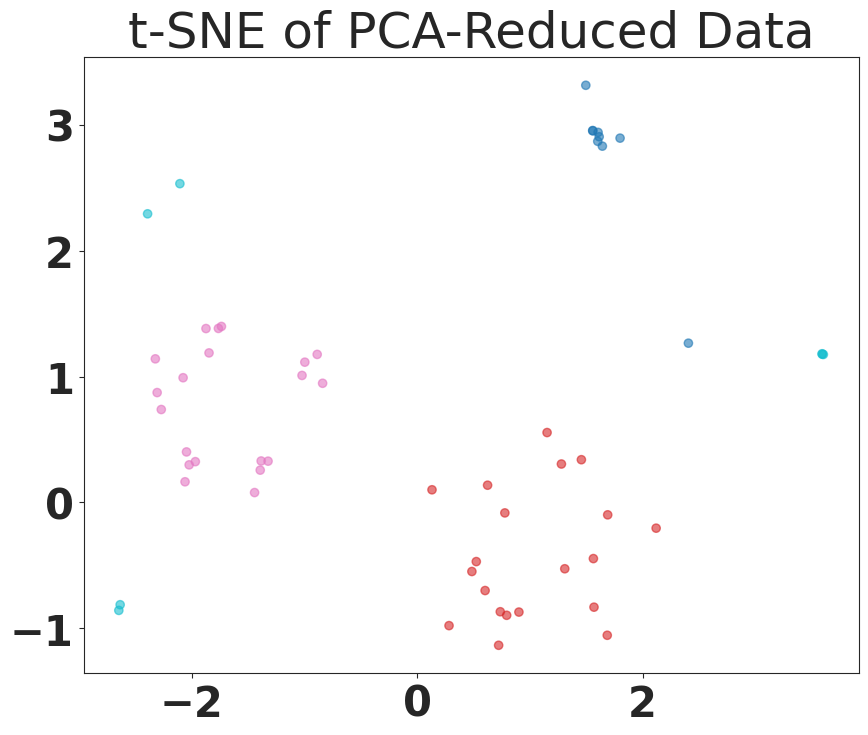

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Metrics:
Normalized Mutual Information (NMI): 0.8628264996152113
Adjusted Rand Index (ARI): 0.8697708506572868
Homogeneity: 0.8419827834744833
Completeness: 0.8847284055799015


In [ ]:
#from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE
#import matplotlib.pyplot as plt

# do PCA to reduce dimensions
pca = PCA(n_components=50)
pca_result = pca.fit_transform(expr2) # use transformed data

# t-SNE to PCA-reduced data
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_pca = tsne.fit_transform(pca_result)

# plot t-SNE PCA results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_pca[:, 0], tsne_pca[:, 1], c=label, cmap='tab10', alpha=0.6)
plt.title('t-SNE of PCA-Reduced Data')
plt.show()


# clustering on PCA-reduced data
kmeans = KMeans(n_clusters=len(np.unique(label)), random_state=42)
predicted_labels = kmeans.fit_predict(pca_result)


# measure clustering performance
metrics = measure(predicted_labels, label)
print("Clustering Metrics:")
print(f"Normalized Mutual Information (NMI): {metrics['NMI']}")
print(f"Adjusted Rand Index (ARI): {metrics['RAND']}")
print(f"Homogeneity: {metrics['HOMOGENEITY']}")
print(f"Completeness: {metrics['COMPLETENESS']}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Metrics:
Normalized Mutual Information (NMI): 0.8628264996152113
Adjusted Rand Index (ARI): 0.8697708506572868
Homogeneity: 0.8419827834744833
Completeness: 0.8847284055799015


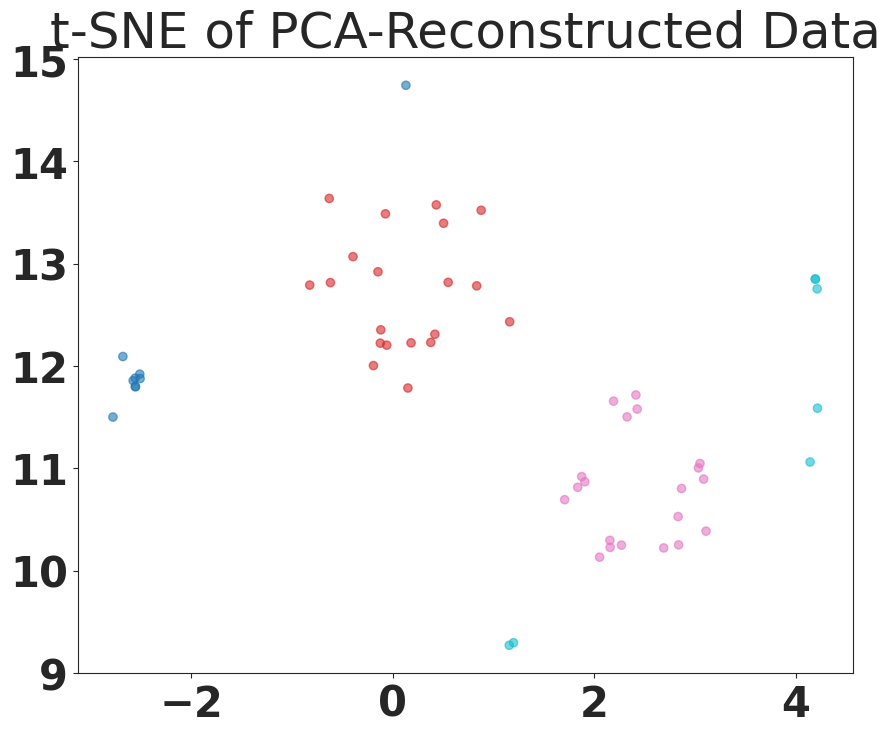

In [ ]:
pca_reconstructed = pca.inverse_transform(pca_result)

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_pca = tsne.fit_transform(pca_reconstructed)

kmeans = KMeans(n_clusters=len(np.unique(label)), random_state=42)
predicted_labels = kmeans.fit_predict(pca_reconstructed)

metrics = measure(predicted_labels, label)
print("Clustering Metrics:")
print(f"Normalized Mutual Information (NMI): {metrics['NMI']}")
print(f"Adjusted Rand Index (ARI): {metrics['RAND']}")
print(f"Homogeneity: {metrics['HOMOGENEITY']}")
print(f"Completeness: {metrics['COMPLETENESS']}")

tsne_reconstructed = tsne.fit_transform(pca_reconstructed)
plt.figure(figsize=(10, 8))
plt.scatter(tsne_reconstructed[:, 0], tsne_reconstructed[:, 1], c=label, cmap='tab10', alpha=0.6)
plt.title('t-SNE of PCA-Reconstructed Data')
plt.show()


t-SNE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


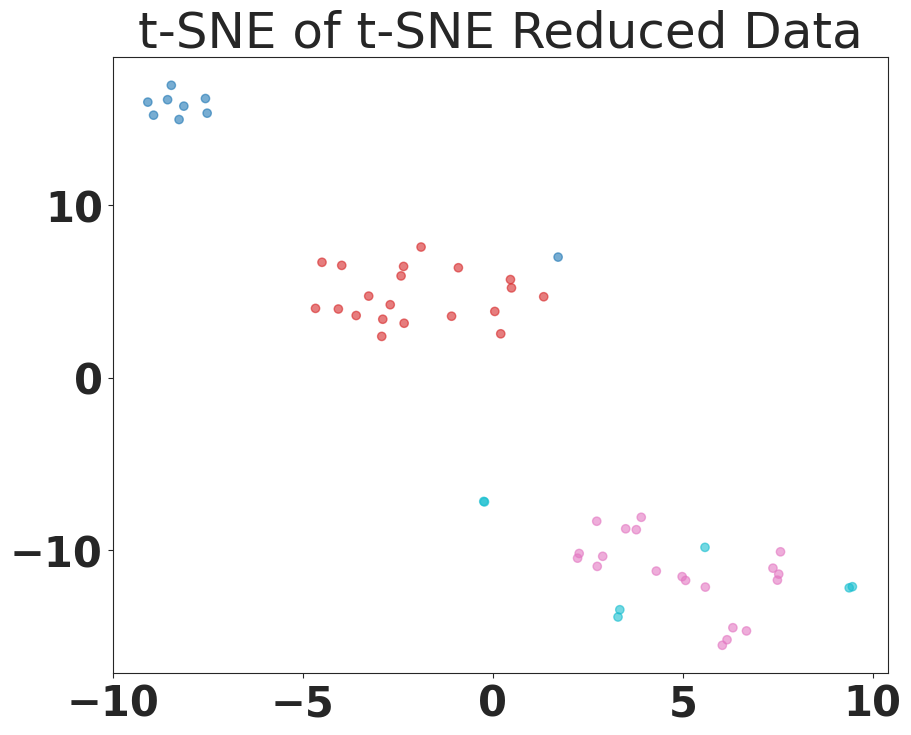

Clustering Metrics:
Normalized Mutual Information (NMI): 0.724993024280294
Adjusted Rand Index (ARI): 0.6603062495667171
Homogeneity: 0.7323475030067922
Completeness: 0.717784789199681


In [ ]:

# do t-SNE to reduce dimensions directly from the expression data
tsne = TSNE(n_components=2, perplexity=11, n_iter=300, random_state=42) # .2*n rule from paper
tsne_result = tsne.fit_transform(expr2)

# cluster on t-SNE-reduced data
kmeans = KMeans(n_clusters=len(np.unique(label)), random_state=42)
predicted_labels = kmeans.fit_predict(tsne_result)

# plot t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=label, cmap='tab10', alpha=0.6)
plt.title('t-SNE of t-SNE Reduced Data')
plt.show()

# measure clustering performance
metrics = measure(predicted_labels, label)
print("Clustering Metrics:")
print(f"Normalized Mutual Information (NMI): {metrics['NMI']}")
print(f"Adjusted Rand Index (ARI): {metrics['RAND']}")
print(f"Homogeneity: {metrics['HOMOGENEITY']}")
print(f"Completeness: {metrics['COMPLETENESS']}")
